In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np

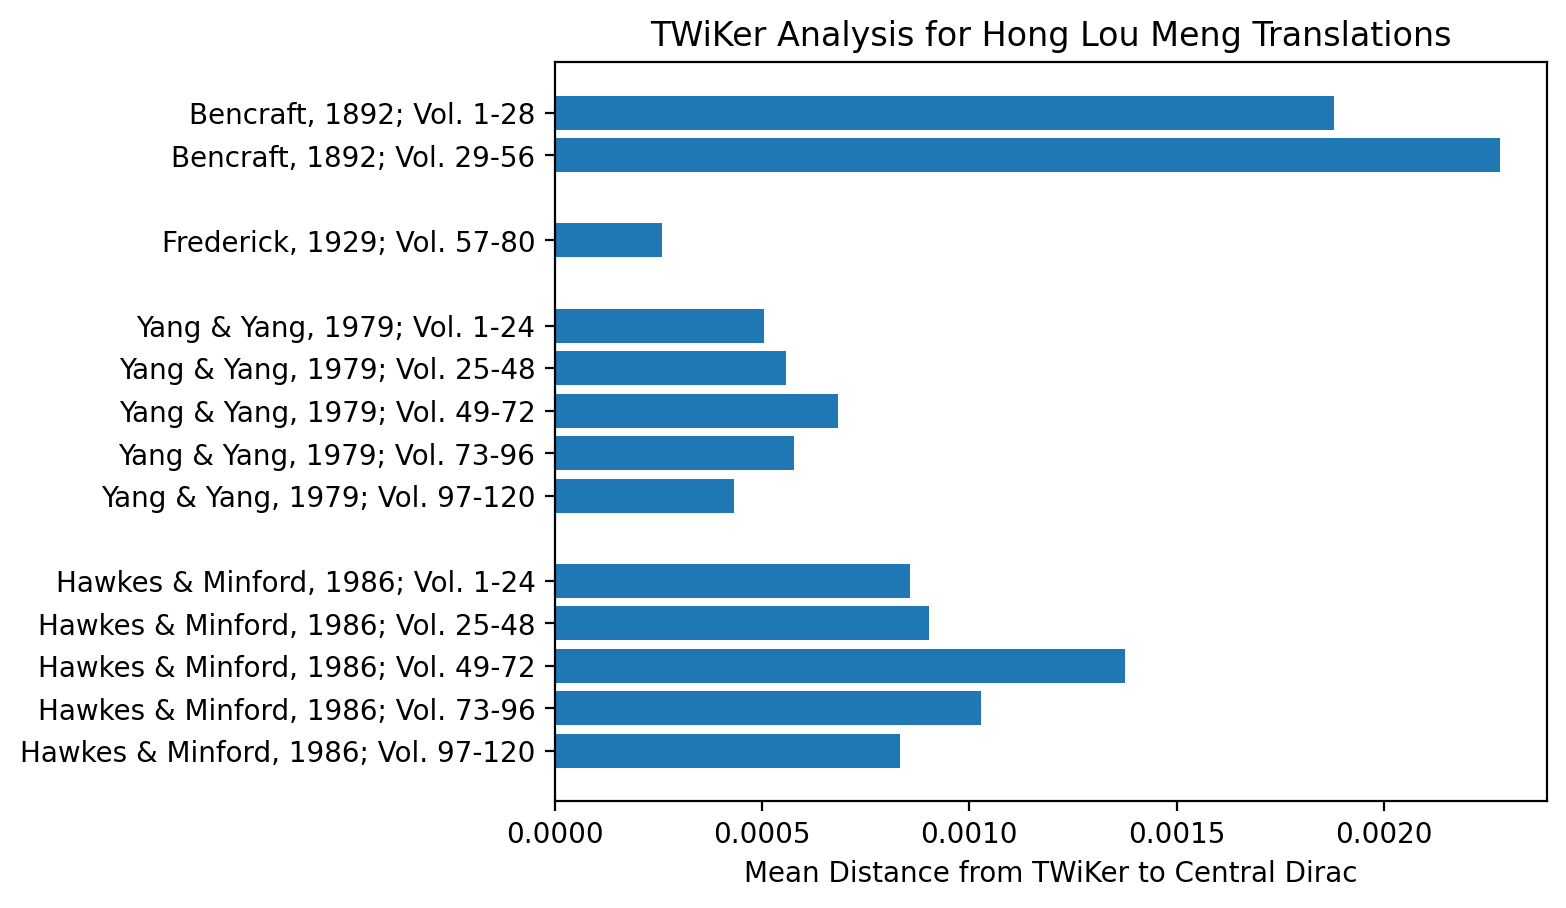

In [2]:
# Book dictionary
books = {
    "stone_Y1_24": "Yang & Yang, 1979; Vol. 1-24",
    "stone_Y25_48": "Yang & Yang, 1979; Vol. 25-48",
    "stone_Y49_72": "Yang & Yang, 1979; Vol. 49-72",
    "stone_Y73_96": "Yang & Yang, 1979; Vol. 73-96",
    "stone_Y97_120": "Yang & Yang, 1979; Vol. 97-120",
    "stone_H1_24": "Hawkes & Minford, 1986; Vol. 1-24",
    "stone_H25_48": "Hawkes & Minford, 1986; Vol. 25-48",
    "stone_H49_72": "Hawkes & Minford, 1986; Vol. 49-72",
    "stone_H73_96": "Hawkes & Minford, 1986; Vol. 73-96",
    "stone_H97_120": "Hawkes & Minford, 1986; Vol. 97-120",
    "stone_B1_28": "Bencraft, 1892; Vol. 1-28",
    "stone_B29_56": "Bencraft, 1892; Vol. 29-56",
    "stone_F57_80": "Frederick, 1929; Vol. 57-80",
}

# Load JSON data
pos_dist_dict_book = {}
for book in books:
    with open(f"results/distance/{book}.json", "r") as file:
        pos_dist_dict_book[book] = json.load(file)

# Define groups
groups = [
    ["stone_B1_28", "stone_B29_56"],
    ["stone_F57_80"],
    ["stone_Y1_24", "stone_Y25_48", "stone_Y49_72", "stone_Y73_96", "stone_Y97_120"],
    ["stone_H1_24", "stone_H25_48", "stone_H49_72", "stone_H73_96", "stone_H97_120"],
]

# Flatten for ordering
ordered_keys = [key for group in groups for key in group]
ordered_labels = [books[key] for key in ordered_keys]
ordered_values = [pos_dist_dict_book[key]["all"] for key in ordered_keys]

# Add spacing between groups
spaced_labels = []
spaced_values = []
group_spacer = 1  # Space between groups

pos = 0  # Current position
positions = []

for group in groups:
    for key in group:
        spaced_labels.append(books[key])
        spaced_values.append(pos_dist_dict_book[key]["all"])
        positions.append(pos)
        pos += 1  # Normal increment
    pos += group_spacer  # Add spacing after each group

# Plot
plt.figure(dpi=200)
plt.barh(positions, spaced_values, align="center")
plt.yticks(positions, spaced_labels)
plt.xlabel("Mean Distance from TWiKer to Central Dirac")
plt.title("TWiKer Analysis for Hong Lou Meng Translations")
plt.gca().invert_yaxis()
plt.savefig("results/figs/hongloumeng/all.pdf", bbox_inches="tight", pad_inches=0.05)
plt.show()

In [3]:
classes = {
    "intj": "Interjection (Wow, Ha)",
    "propn": "Proper Noun (Harry, USA)",
    "noun": "Noun (apple, car)",
    "verb": "Verb (run, eat)",
    "adj": "Adjective (happy, tall)",
    "adv": "Adverb (quickly, softly)",
    "sconj": "Subord. Conj. (if, as)",
    "aux": "Auxiliary Verb (is, has)",
    "prop": "Preposition (in, of)",
    "pron": "Pronoun (she, they)",
    "cconj": "Coord. Conj. (and, or)",
    "det": "Determiner (the, an)"
}

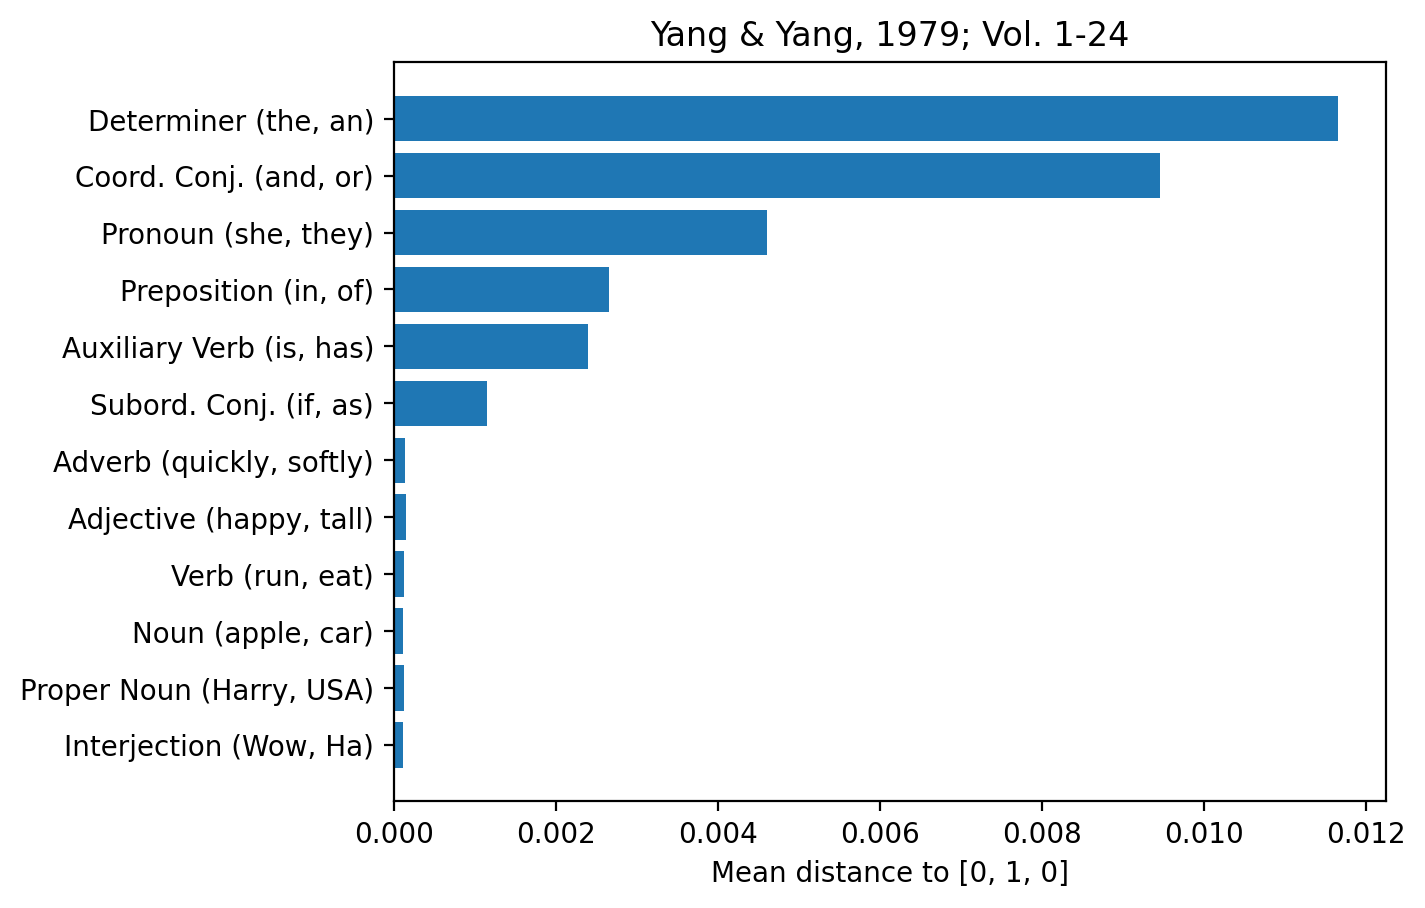

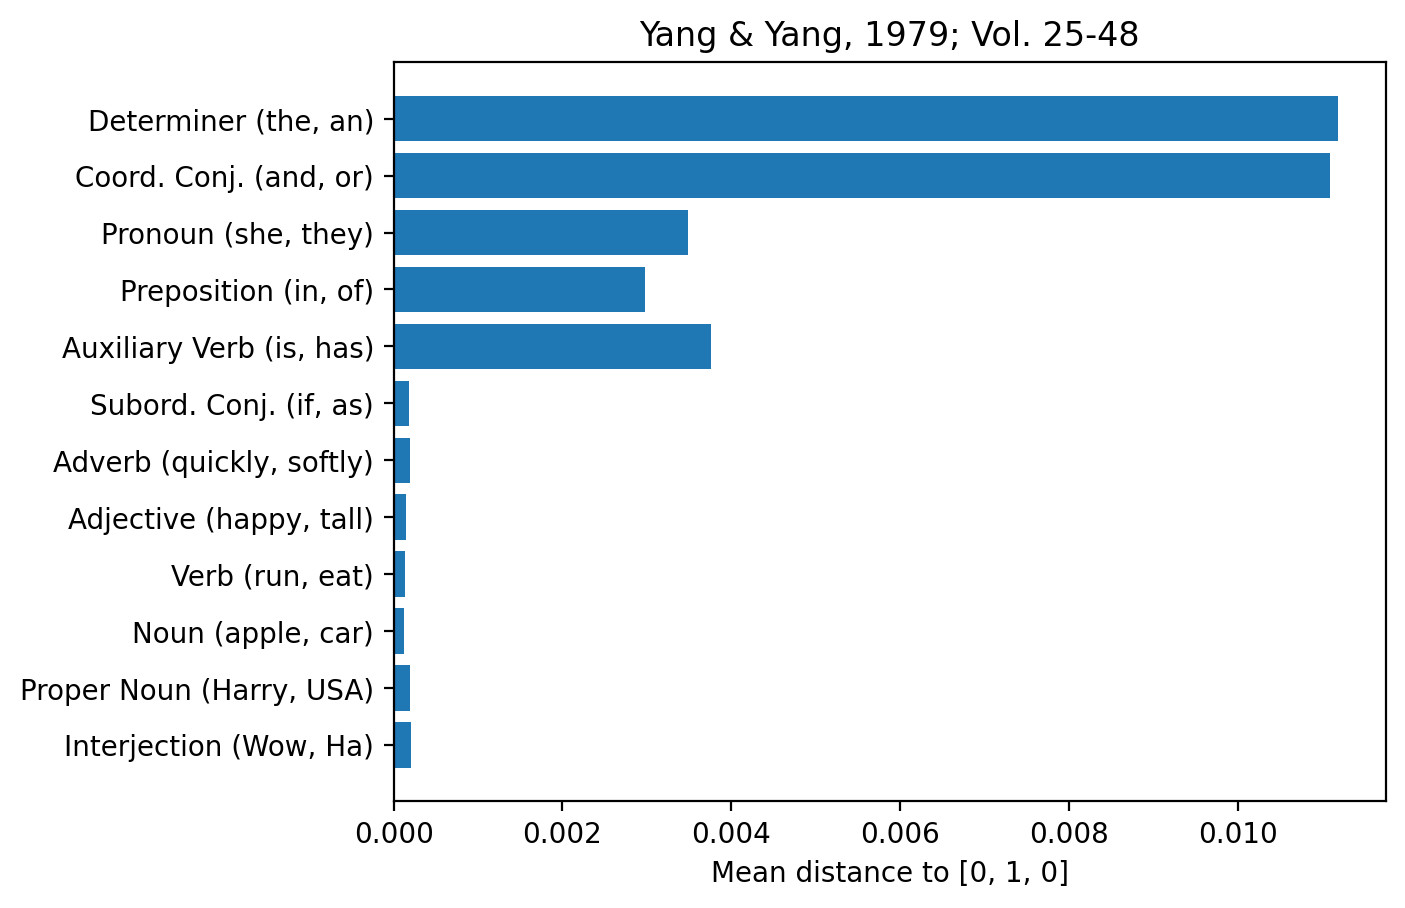

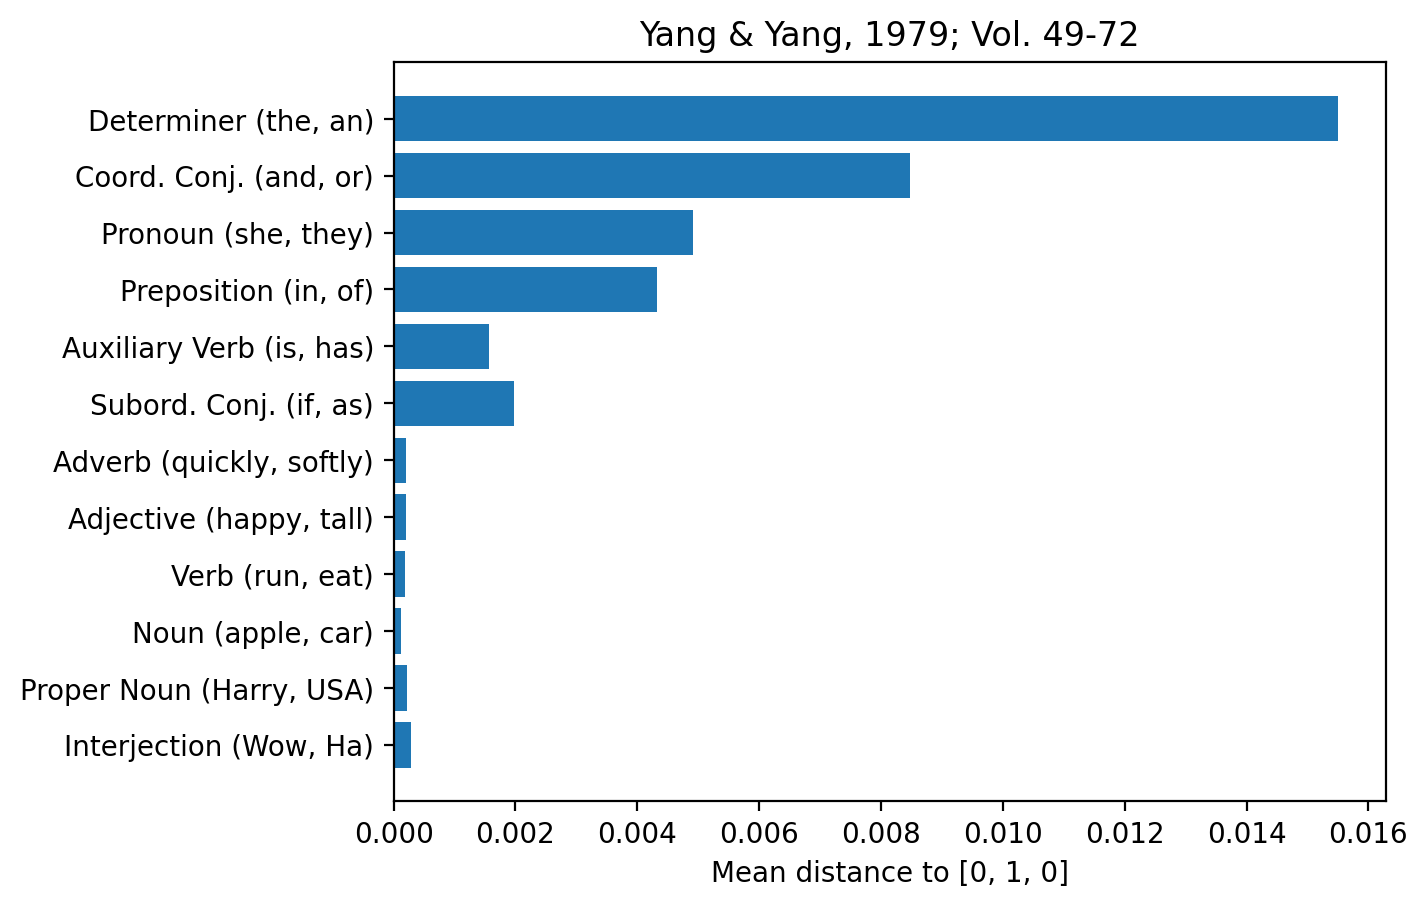

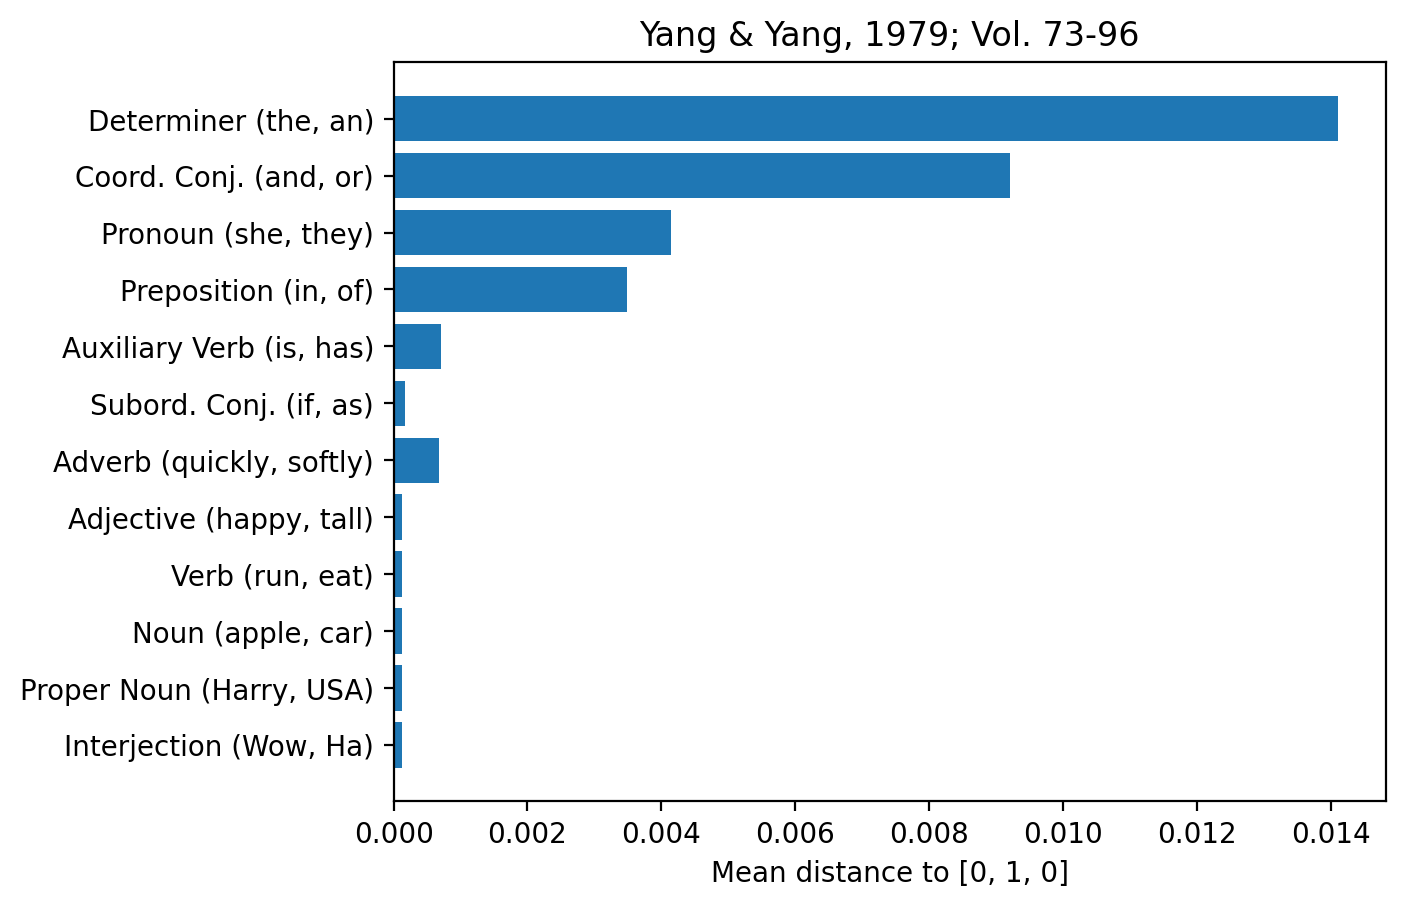

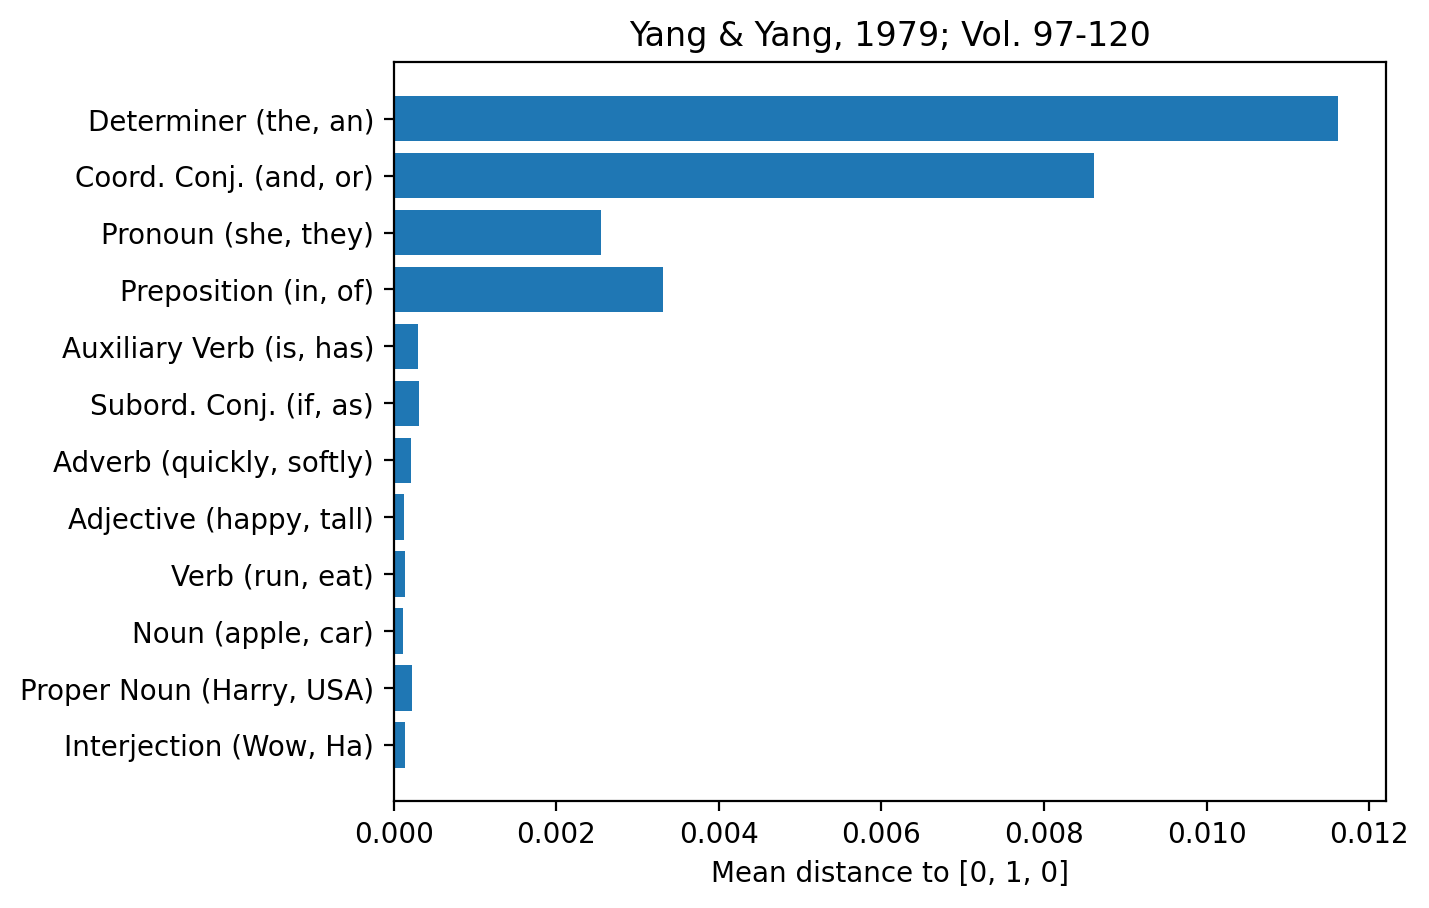

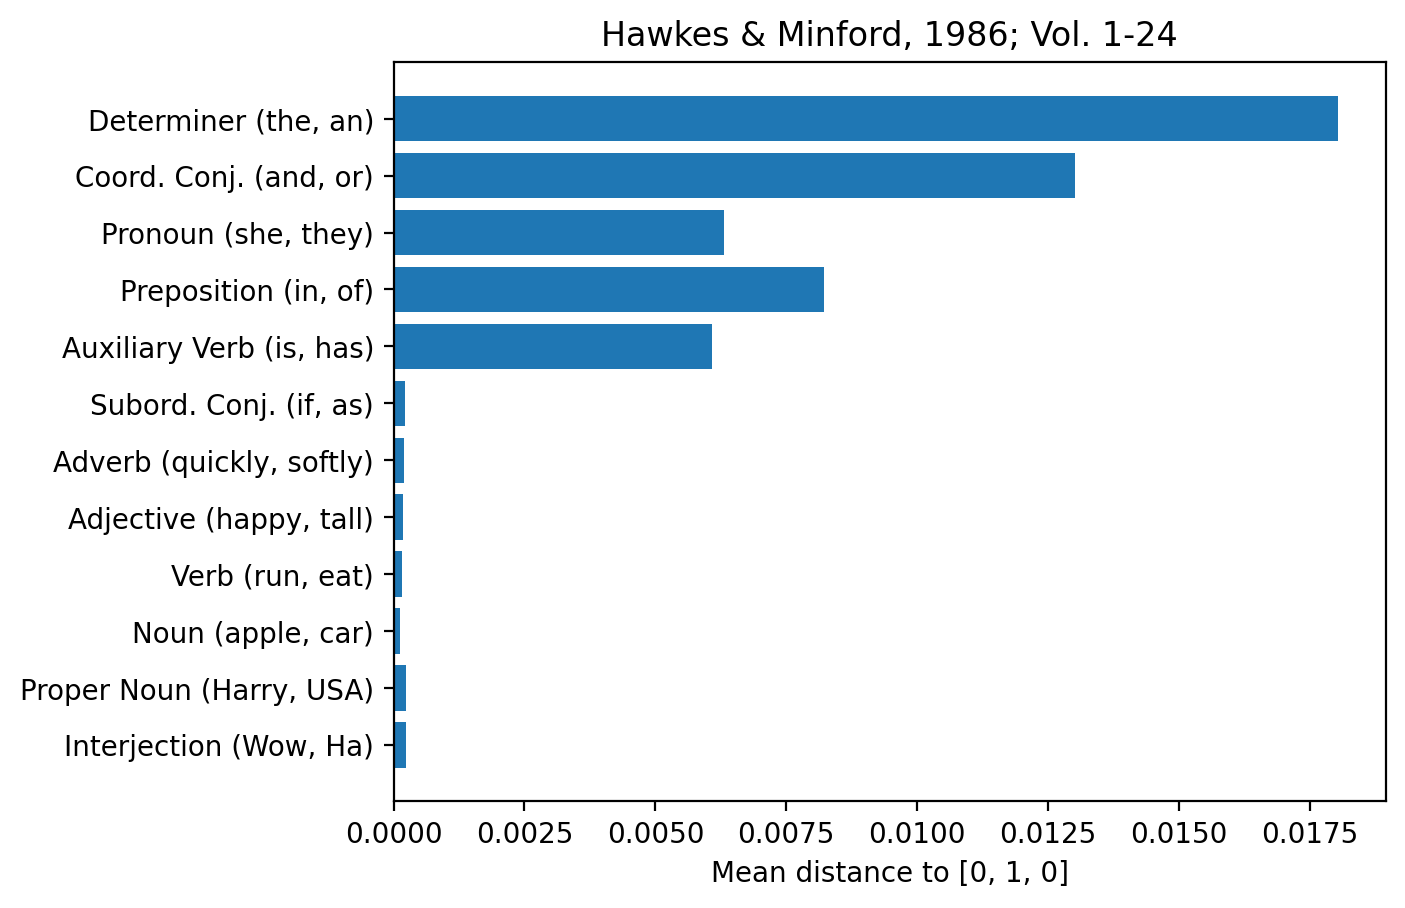

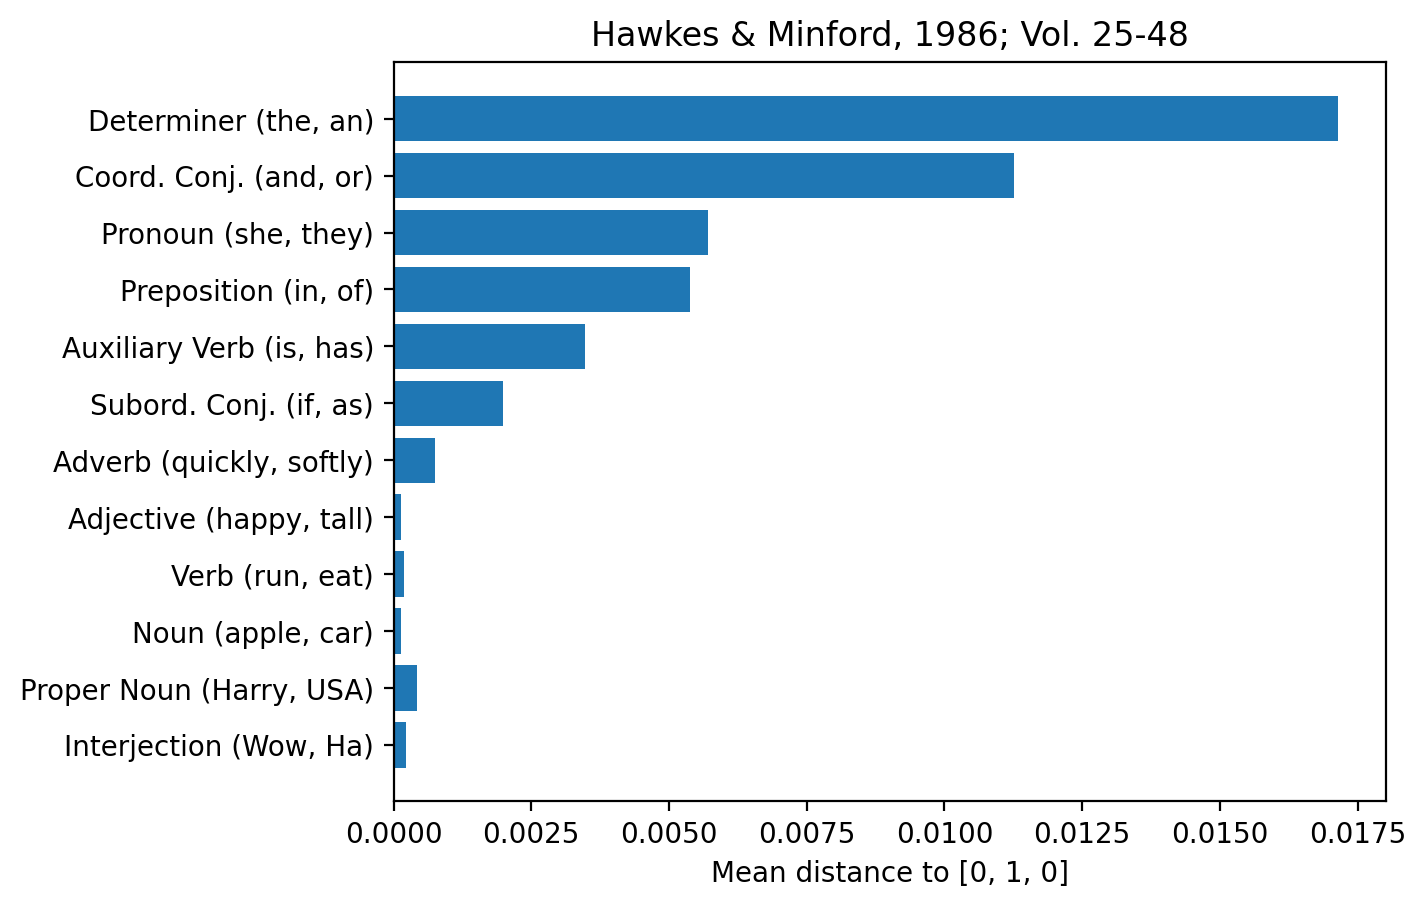

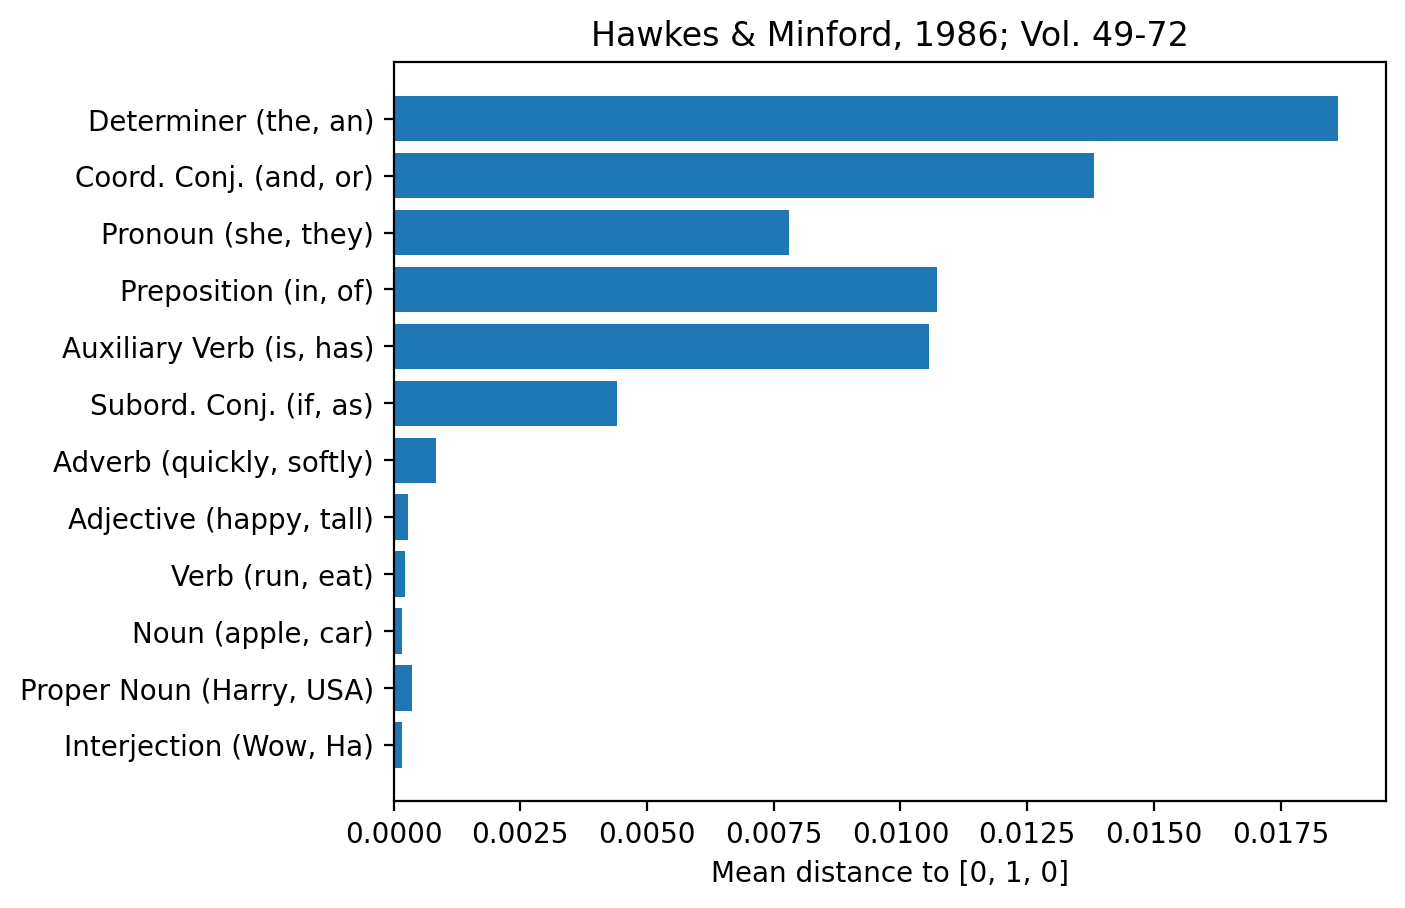

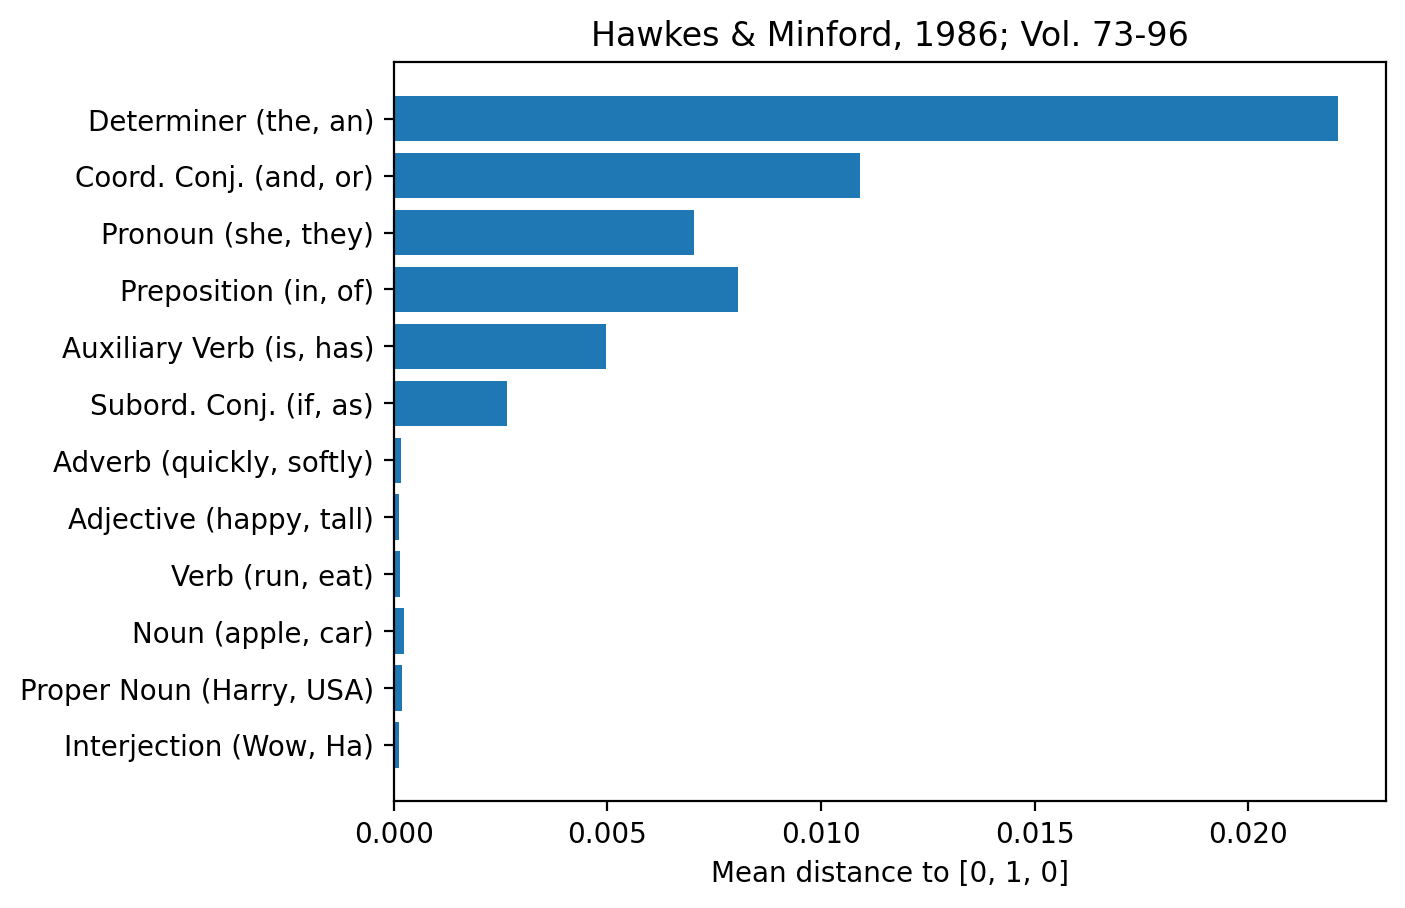

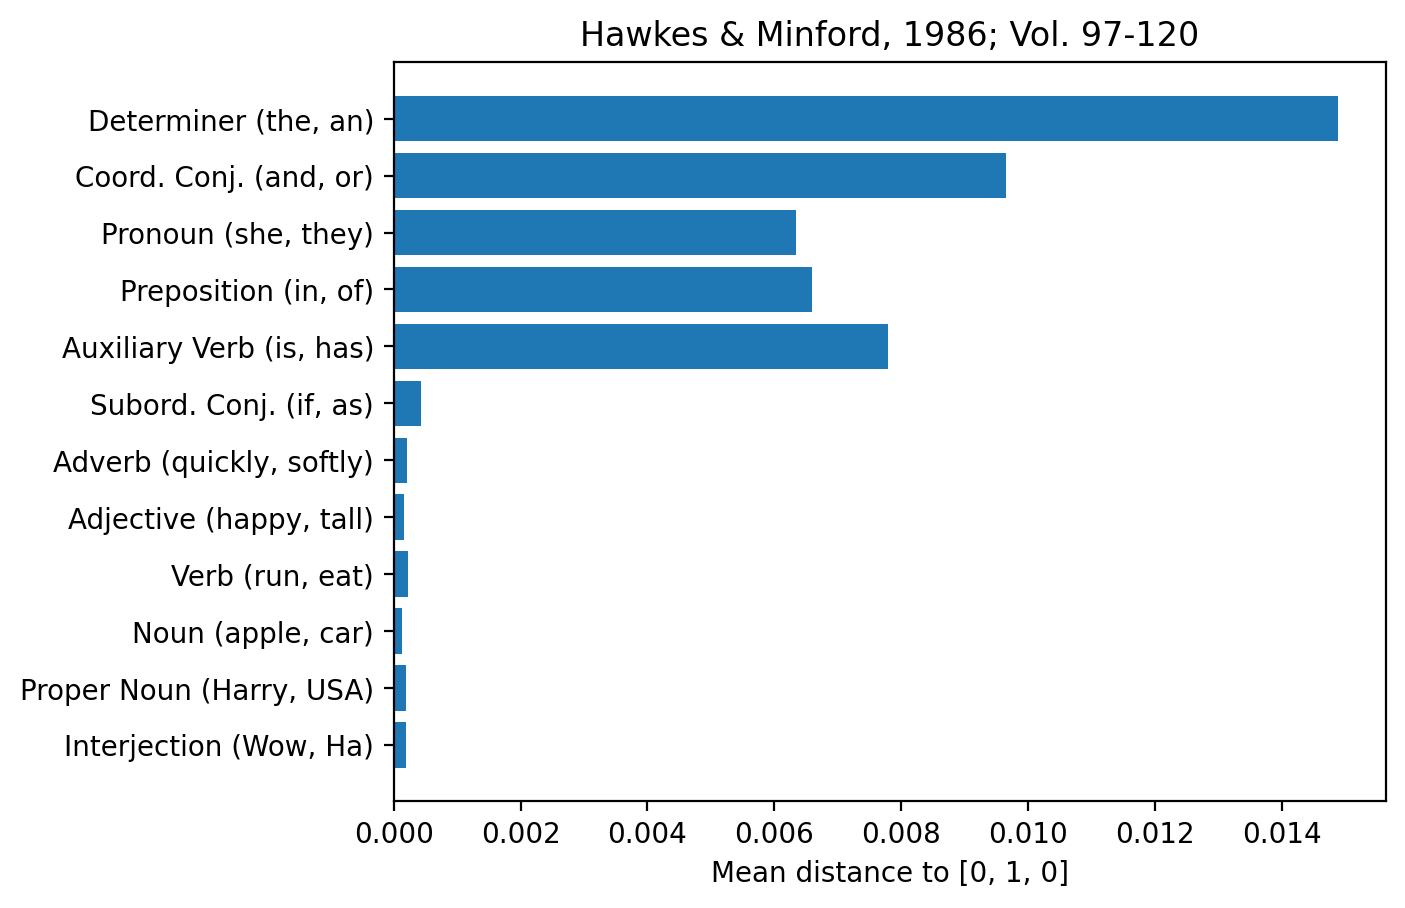

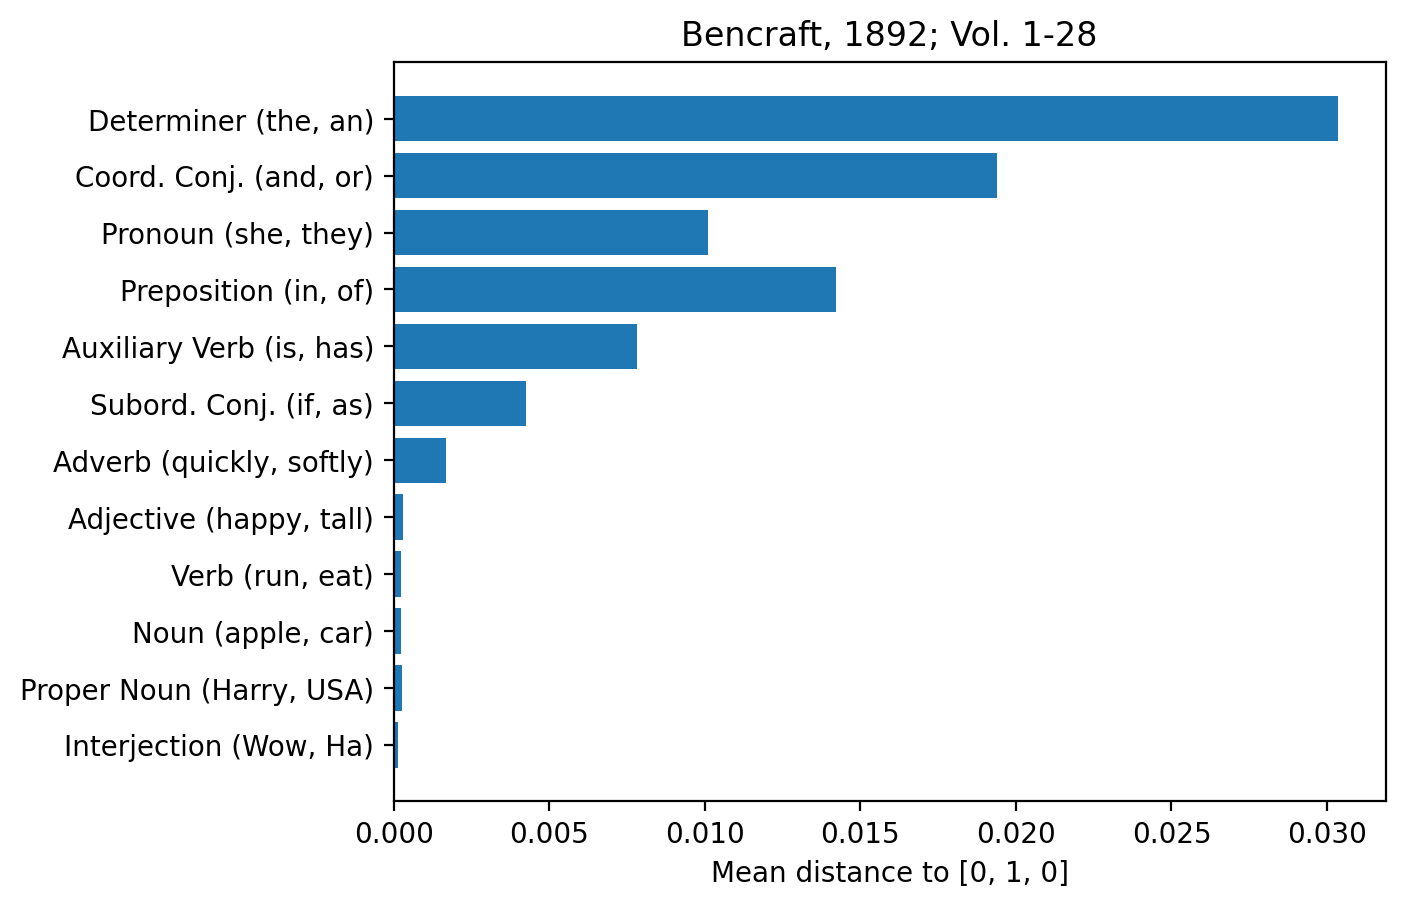

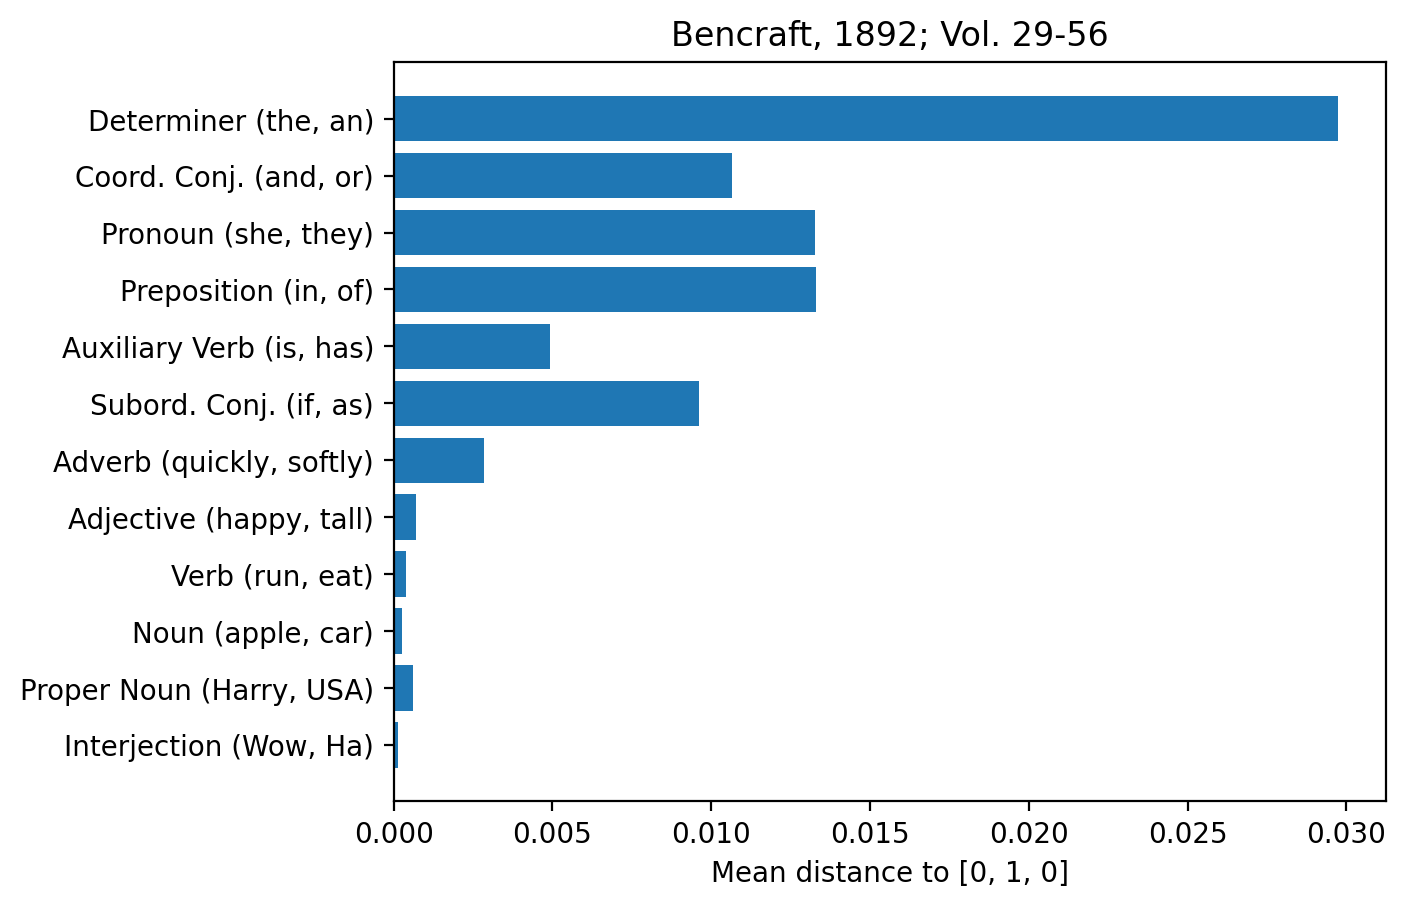

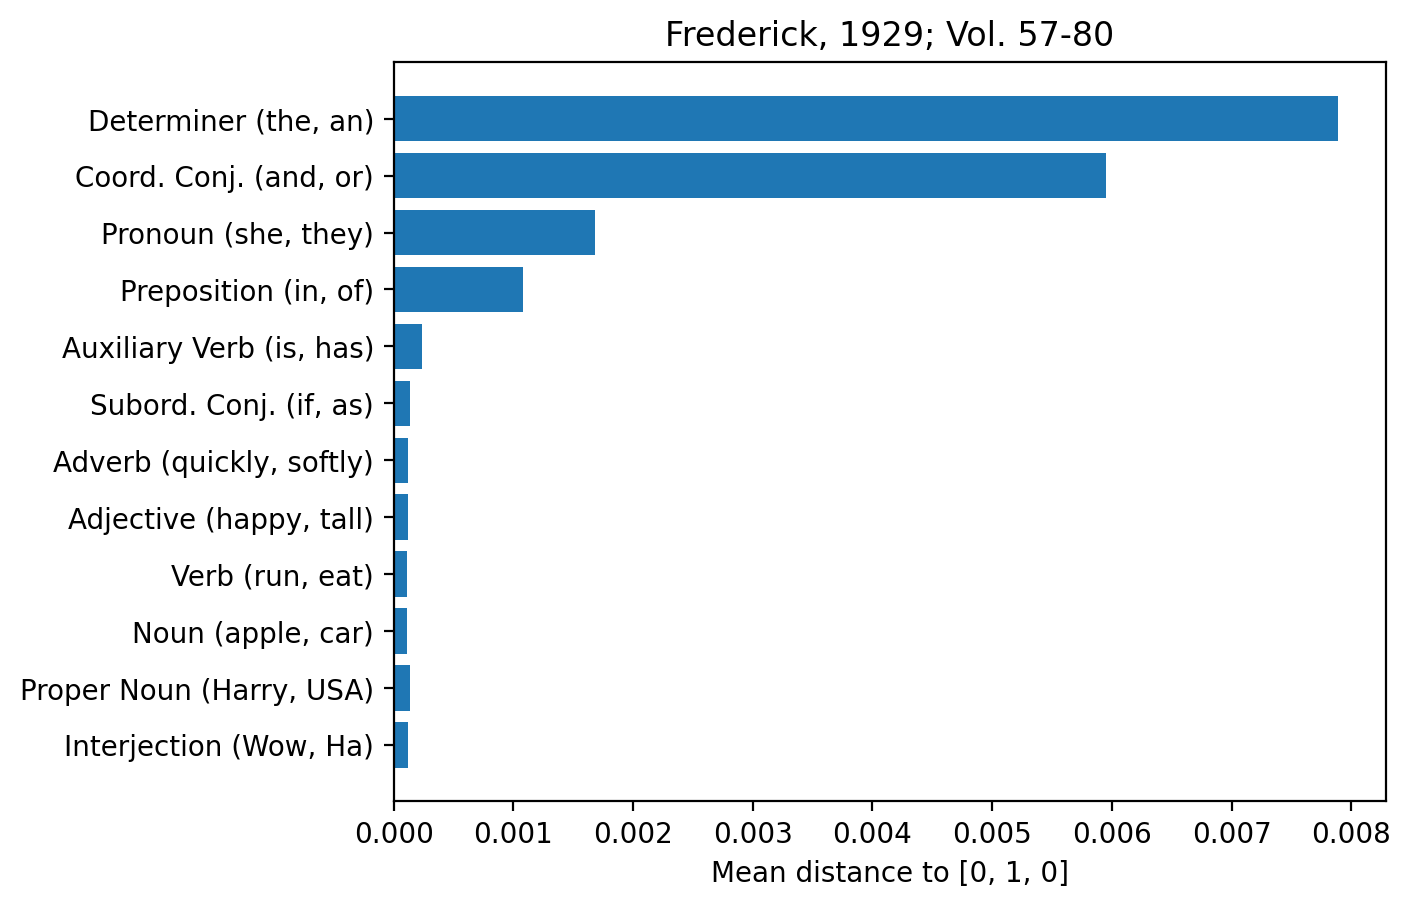

In [4]:
for book in books:
    plt.figure(dpi=200)
    plt.barh(classes.values(), [pos_dist_dict_book[book][k] for k in classes.keys()])
    plt.title(books[book])
    plt.xlabel("Mean distance to [0, 1, 0]")
    plt.savefig(f"results/figs/hongloumeng/{book}.pdf", bbox_inches="tight", pad_inches=0.05)
    plt.show()

In [5]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.lines as mlines

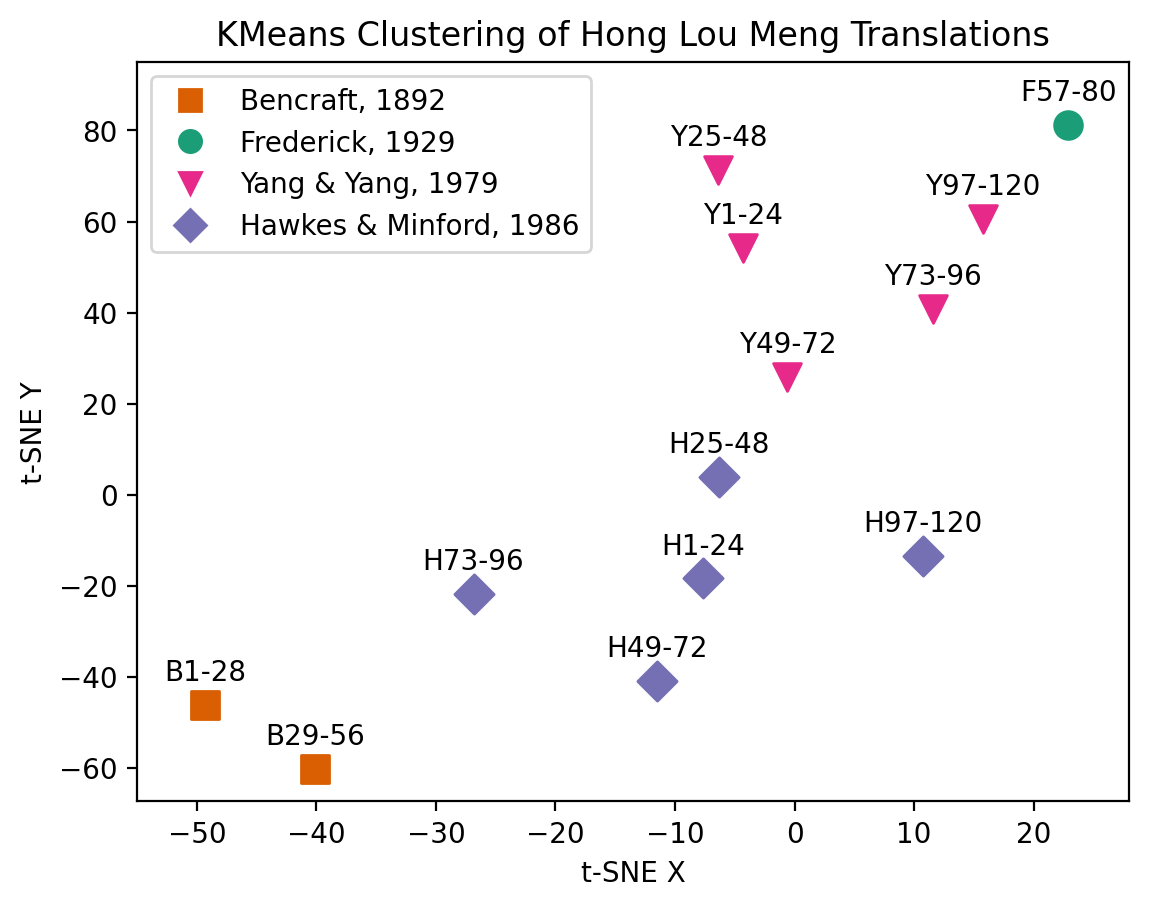

In [6]:
X = np.array([[pos_dist_dict_book[book][k] for k in classes.keys()] for book in books])

# Define number of clusters
n_clusters = 4

# Initialize and fit KMeans
model = KMeans(n_clusters=n_clusters,
               init='k-means++',  # Smarter centroid initialization
               random_state=4)  # Ensure reproducibility
model.fit(X)

# Apply t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=5)  # Perplexity adjusted for small dataset
X_tsne = tsne.fit_transform(X)

# Plot t-SNE visualization with KMeans labels
plt.figure(dpi=200)
shapes = ['o', 's', 'D', 'v']
for i, label in enumerate(model.labels_):
    plt.scatter(X_tsne[i, 0], X_tsne[i, 1], c=[plt.cm.Dark2(label % len(shapes))],
                s=100, marker=shapes[label % len(shapes)])
    plt.text(X_tsne[i, 0], X_tsne[i, 1] + 4, list(books.keys())[i][6:].replace("_", "-"),
             ha="center", va="bottom")

# Create legend manually
legend_labels = ["Frederick, 1929",
                 "Bencraft, 1892",
                 "Hawkes & Minford, 1986",
                 "Yang & Yang, 1979"
                 ]
reorder = [1, 0, 3, 2]
legend_handles = [mlines.Line2D([], [], color=plt.cm.Dark2(reorder[i]), marker=shapes[reorder[i]], linestyle='None',
                                markersize=8, label=legend_labels[reorder[i]]) for i in range(len(shapes))]
plt.legend(handles=legend_handles, loc="upper left")

plt.title("KMeans Clustering of Hong Lou Meng Translations")
plt.xlabel("t-SNE X")
plt.ylabel("t-SNE Y")
plt.xlim(-55, 28)
plt.ylim(None, 95)
plt.savefig(f"results/figs/hongloumeng/kmeans.pdf", bbox_inches="tight", pad_inches=0.05)
plt.show()